# Імпорт необхідних бібліотек (Import Required Libraries)
Імпортуємо matplotlib.pyplot для побудови графіка та numpy для роботи з масивами даних.

In [2]:
import matplotlib.pyplot as plt
import numpy as np

# Створення даних для графіка (Create Data for Plot)
Використаємо реальні дані про частку російськомовних книжок за 2020–2024 роки.

In [4]:
years = np.array([2020, 2021, 2022, 2023, 2024])
share = np.array([11.6, 12.2, 7.9, 4.6, 3.3])  # Частка (%) російськомовних книжок

# Побудова графіка (Plot the Graph)
Побудуємо лінійний графік частки російськомовних книжок за роками.

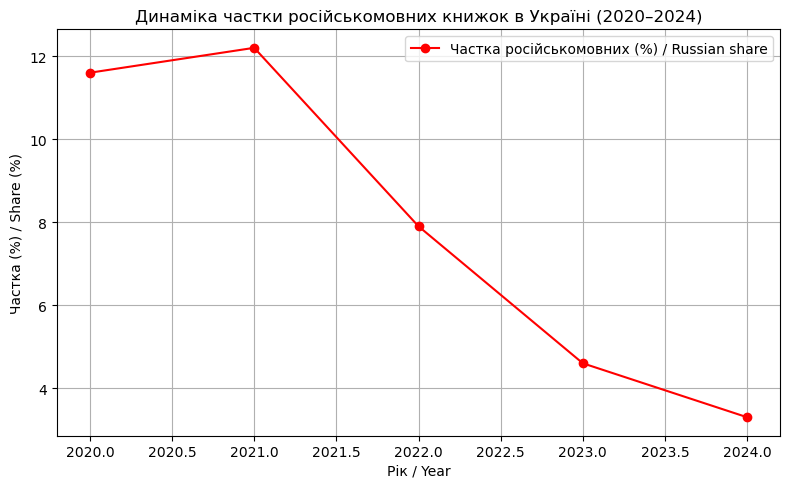

In [6]:
plt.figure(figsize=(8,5))
plt.plot(years, share, marker='o', linestyle='-', color='red', label='Частка російськомовних (%) / Russian share')
plt.xlabel('Рік / Year')
plt.ylabel('Частка (%) / Share (%)')
plt.title('Динаміка частки російськомовних книжок в Україні (2020–2024)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# Налаштування вигляду графіка (Customize the Plot)
Додаємо підписи, заголовок, легенду та сітку для кращої візуалізації.

# Комбінований графік: частка україномовних та російськомовних книжок
Стовпчикова діаграма для україномовних книжок (Ukrainian-language books, bar) і лінійна для російськомовних (Russian-language books, line) на одному графіку.

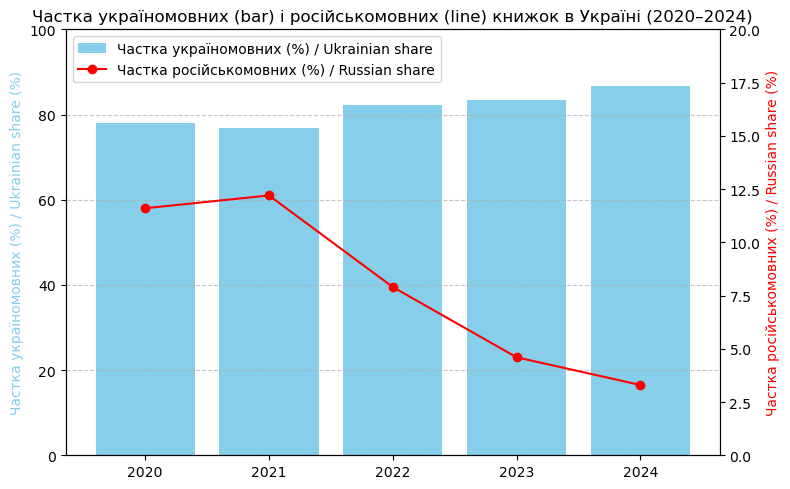

In [9]:
# Дані для україномовних книжок (Ukrainian-language books)
ukr_share = np.array([78.0, 76.8, 82.2, 83.5, 86.8])  # Частка (%) україномовних книжок (розраховано)

fig, ax1 = plt.subplots(figsize=(8,5))

# Стовпчикова діаграма для україномовних
bars = ax1.bar(years, ukr_share, color='skyblue', label='Частка україномовних (%) / Ukrainian share')
ax1.set_ylabel('Частка україномовних (%) / Ukrainian share (%)', color='skyblue')
ax1.set_ylim(0, 100)

# Додаємо другу вісь Y для російськомовних
ax2 = ax1.twinx()
ax2.plot(years, share, marker='o', linestyle='-', color='red', label='Частка російськомовних (%) / Russian share')
ax2.set_ylabel('Частка російськомовних (%) / Russian share (%)', color='red')
ax2.set_ylim(0, 20)

# Заголовок та сітка
plt.title('Частка україномовних (bar) і російськомовних (line) книжок в Україні (2020–2024)')
ax1.grid(True, axis='y', linestyle='--', alpha=0.7)

# Легенда
lines_labels = [ax1.get_legend_handles_labels(), ax2.get_legend_handles_labels()]
lines, labels = [sum(lol, []) for lol in zip(*lines_labels)]
ax1.legend(lines, labels, loc='upper left')

plt.tight_layout()
plt.show()

# Аналіз трьох областей з найвищими накладами
Виберемо три області з найбільшими сумарними накладами за всі роки та побудуємо графік їх динаміки (наклад по роках).

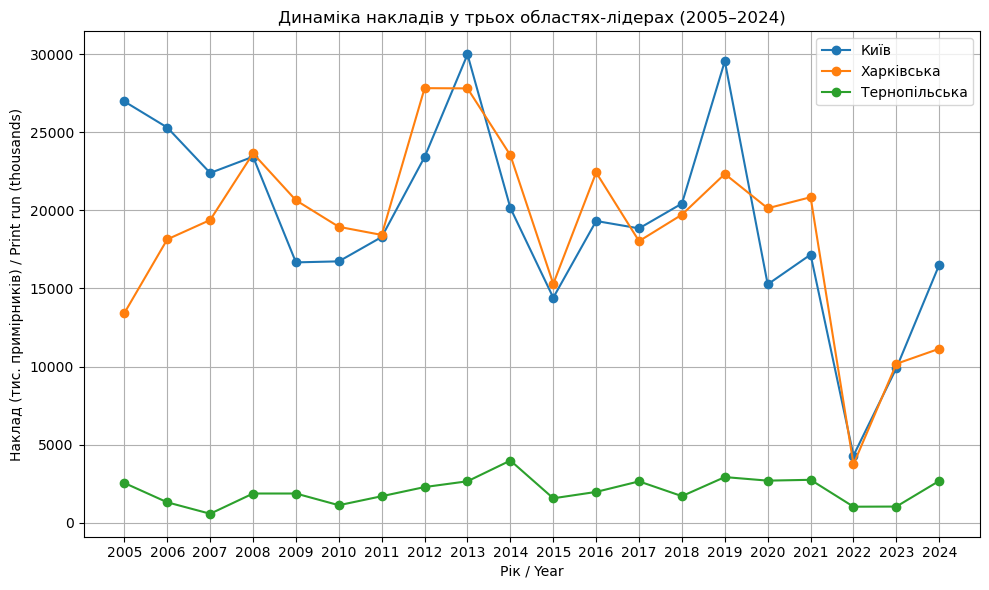

In [16]:
import pandas as pd

# Завантажуємо дані з файлу
file_path = 'Ukrainian books - Терир. наклад.csv'
df = pd.read_csv(file_path, index_col=0)

# Вибираємо лише роки (стовпці з числами)
years = [col for col in df.columns if col[:4].isdigit()]
df_years = df[years].apply(lambda x: pd.to_numeric(x.astype(str).str.replace(',', '.').str.replace(' ', ''), errors='coerce'))

# Знаходимо три області з найбільшим сумарним накладом
sums = df_years.sum(axis=1)
top3 = sums.sort_values(ascending=False).head(3).index

# Побудова графіка
plt.figure(figsize=(10,6))
for region in top3:
    plt.plot(years, df_years.loc[region], marker='o', label=region)
plt.xlabel('Рік / Year')
plt.ylabel('Наклад (тис. примірників) / Print run (thousands)')
plt.title('Динаміка накладів у трьох областях-лідерах (2005–2024)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Динаміка накладів у Криму, Луганській, Донецькій та Херсонській областях
Окремі графіки для кожної з цих областей за всі роки (2005–2024).

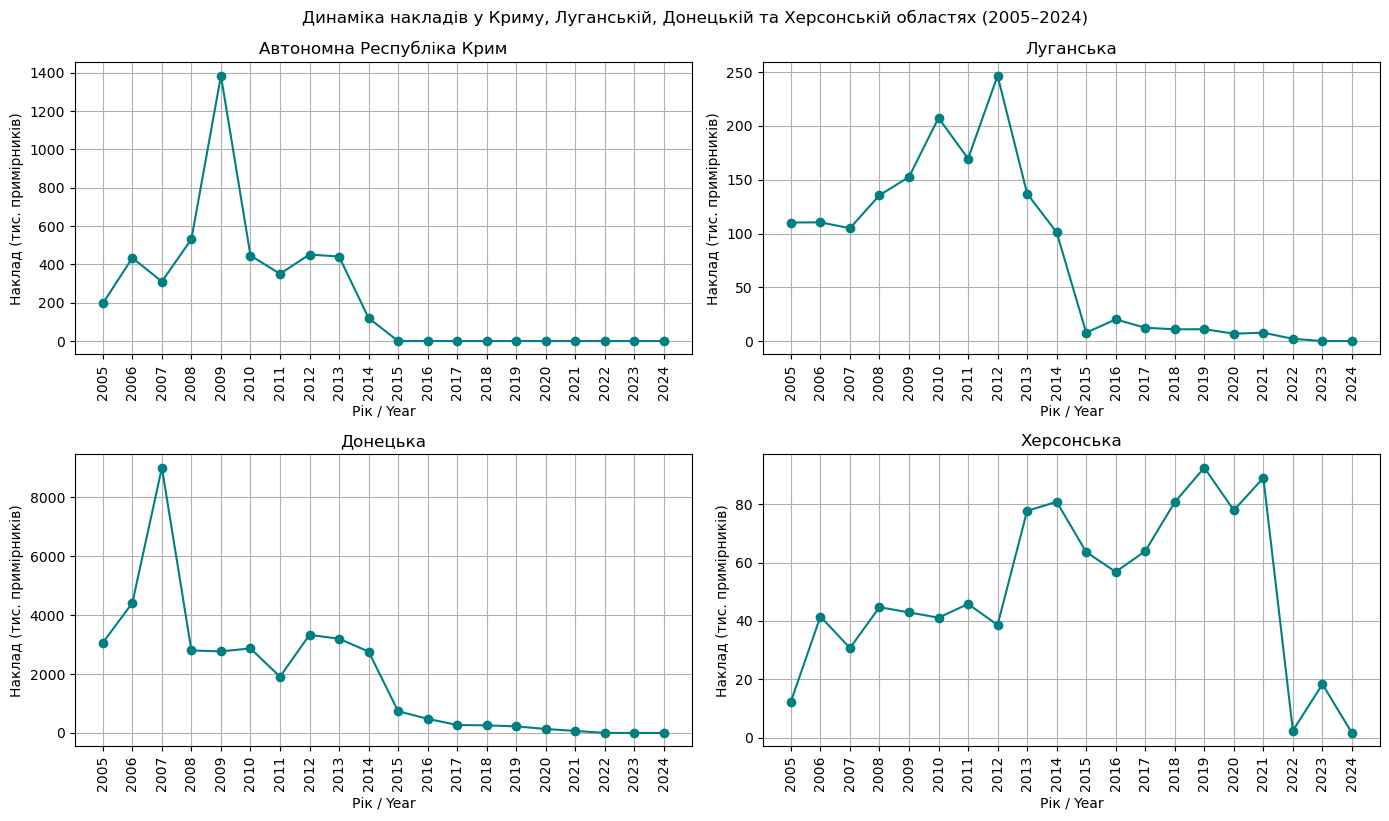

In [20]:
regions = ['Автономна Республіка Крим', 'Луганська', 'Донецька', 'Херсонська']
plt.figure(figsize=(14,8))
for i, region in enumerate(regions, 1):
    plt.subplot(2, 2, i)
    plt.plot(years, df_years.loc[region], marker='o', color='teal')
    plt.title(region)
    plt.xlabel('Рік / Year')
    plt.ylabel('Наклад (тис. примірників)')
    plt.xticks(rotation=90)  # <-- Додаємо цей рядок
    plt.grid(True)
    plt.tight_layout()
plt.suptitle('Динаміка накладів у Криму, Луганській, Донецькій та Херсонській областях (2005–2024)', y=1.02)
plt.show()